In [294]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter

### BACKGROUND'I SİLME
def cluster_colors(path):
    img = cv2.imread(path)
    img = cv2.resize(img,(100,125)) ### GORSELI BICIMLENDIRME

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) ### COLOR CORRECTION
    
    blur_kernel = np.ones((1,1),dtype=np.float32)/4
    img = cv2.filter2D(img,-1,blur_kernel)

    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) ### GRAYSCALE KOPYASINI ALMA

    img_gray[img_gray>=220] = 0 

    ret,thresh1 = cv2.threshold(img_gray,(img_gray.max() + img_gray.min())/2,255,cv2.THRESH_BINARY) ###  THRESHOLDDAN GECIRME

    kernel1 = np.ones((7,7),dtype=np.float32) ### DILATION KERNELI
    kernel2 = np.ones((2,2),dtype=np.float32) ### EROSION KERNELI

    thresh1 = cv2.dilate(thresh1,kernel1)

    thresh1 = cv2.erode(thresh1,kernel2)

    mask1 = thresh1  ### ARKAPLANI SIYAH YAPMAK ICIN MASKE

    result = cv2.bitwise_or(img,img,mask=mask1) ### ARKAPLANI SIYAH GORSEL
    sayac = 0
    #for i in result:
    #    for j in i:
    #        if j[0] == 0 & j[1] == 0 & j[2] == 0 :
    #            j[0] = -5
    #            j[1] = -5
    #            j[2] = -5
    #            sayac += 1
                
    ### PREPROCESSING

    flatten_img = result.reshape((result.shape[0]*result.shape[1],3))     ### 2D HALINE GETIRILMIS GORSEL
    
    ### BUILDING MODEL 

    number_of_colors = 2  ### CLUSTER SAYISI

    model = KMeans(n_clusters = number_of_colors,max_iter=500) ### KUMELEME ALGORITMASI CONFIGURASYONU
    labels = model.fit_predict(flatten_img)       ### GORSELIN RENKLERINI OZUTLEME

    counts = Counter(labels) ### CLUSTER ELEMAN SAYILARINI SIRALAMA

    colors = model.cluster_centers_ ### CLUSTER MERKEZ KOORDINATLARI

    def RGB2HEX(color):
        return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

    ordered_colors = [colors[i] for i in counts.keys()] ### ELEMAN SAYILARINA GORE SIRALANMIŞ MERKEZ KOORDINATLARI

    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()] ### CLUSTER MERKEZ RENK KODLARININ HEXADECIMAL YAZIMI

    ordered_counts = np.zeros((number_of_colors))
    
    a = 0
    for i in counts.values():
        ordered_counts[a] = i
        a += 1

    ordered_counts = np.sort(ordered_counts,axis=-1) ### KUME ELEMAN SAYILARINI SIRALAMA
    print(ordered_counts)
    print(counts.values())
    plt.figure(figsize = (8, 6))
    plt.pie(ordered_counts, labels = hex_colors, colors = hex_colors)
    
    return ordered_colors

In [297]:
 path = "C:/Users/emrem/Desktop/images_part/train/tshirt/153.jpg"

[5704. 6796.]
dict_values([6796, 5704])


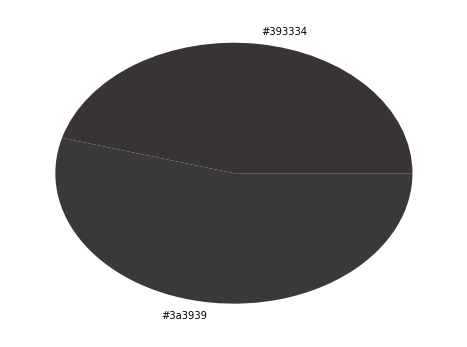

In [298]:
n = cluster_colors(path)

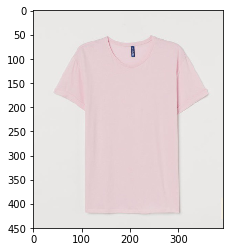

In [299]:
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [195]:
n

[array([250.89418722, 250.88135258, 250.87026941]),
 array([228.56082135, 206.85179804, 209.99028867]),
 array([ 95.86567164,  96.40298507, 135.74129353])]